<a href="https://colab.research.google.com/github/akshayanant/googlecolab/blob/master/PyTorchMakeBlobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.colors

from  matplotlib.colors import LinearSegmentedColormap
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [0]:
data, labels = make_blobs(n_samples = 1000,n_features =4,random_state = 0,centers = 4,cluster_std = 1)
#data, labels = make_moons(n_samples = 1000,random_state = 0,noise = 0.5)
#data, labels = make_circles(n_samples = 1000,random_state = 0,noise = 0.05)

print(data.shape)
print(labels.shape)

(1000, 4)
(1000,)


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow"])

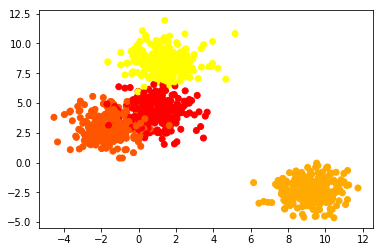

In [0]:
plt.scatter(data[:,0], data[:,1],c=labels,cmap= my_cmap)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data,labels,stratify=labels,random_state = 0)

X_train_tens = torch.from_numpy(X_train).float()
X_test_tens = torch.from_numpy(X_test).float()
Y_train_tens = torch.from_numpy(Y_train).long()
Y_test_tens = torch.from_numpy(Y_test).long()
print(X_train_tens.shape)
print(X_test_tens.shape)
print(Y_train_tens.shape)
print(Y_test_tens.shape)

torch.Size([750, 4])
torch.Size([250, 4])
torch.Size([750])
torch.Size([250])


In [0]:
class FirstPyTorch(nn.Module):
  
  def __init__ (self):
    torch.manual_seed(0)
    super().__init__()
    self.net = nn.Sequential(
                nn.Linear(4, 10),
                nn.Tanh(),
                nn.Linear(10,10),
                nn.Tanh(),
                nn.Linear(10,4),
                nn.Tanh())
    
  def forward(self,X):
    return self.net(X)

In [0]:
def eval(Y,Y_pred):
  count = 0;
  for actual,pred in zip(Y,Y_pred.argmax(-1)):
    if(actual==pred):
      count+=1;
      
  return count/Y.size()[0]

In [0]:
  model = FirstPyTorch()
  loss_fn = F.cross_entropy

  

In [0]:
def train(X,Y,model,loss_fn,epochs = 100, lr = 0.01):
  opt = optim.Adam(model.parameters(),lr)
  acc = {}
  for epoch in range(epochs):
    model.train()
    opt.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred,Y)
    loss.backward()
    opt.step()
    model.eval()
    acc[epoch] = eval(Y,y_pred)
  plt.plot(acc.values())
  plt.show()

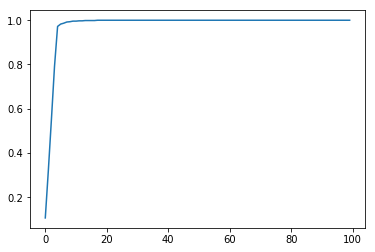

In [0]:

train(X_train_tens,Y_train_tens,model,loss_fn)

In [0]:
y_test_pred = model(X_test_tens)
print(eval(Y_test_tens,y_test_pred))


1.0


In [0]:
def resultPlot(X_test_tens,Y_test_tens,y_test_pred):
  scalar = np.zeros(y_test_pred.size()[0])
  count = 0
  for y,y_pred in zip(Y_test_tens,y_test_pred.argmax(-1)):
    if(y==y_pred):
      scalar[count] = 10
    else:
      scalar[count] = 30
    count+=1
  plt.scatter(X_test_tens[:,0],X_test_tens[:,1],c=y_test_pred.argmax(-1), cmap = my_cmap, s = scalar)
  plt.show()

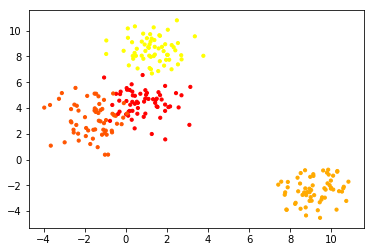

In [0]:
resultPlot(X_test_tens,Y_test_tens,y_test_pred)

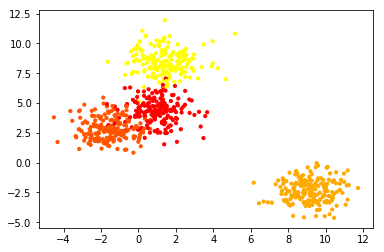

1.0


In [0]:
y_pred = model(X_train_tens)
resultPlot(X_train_tens,Y_train_tens,y_pred)
print(eval(Y_train_tens,y_pred))